<a href="https://colab.research.google.com/github/tmq24/MachineLearning/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

** Submit Link **: https://forms.gle/aAjeG25RPUtQHijs9

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

Age- Age Of The Customer

Employment Type- The Sector In Which Customer Is Employed

GraduateOrNot- Whether The Customer Is College Graduate Or Not

AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]

FamilyMembers- Number Of Members In Customer's Family

ChronicDisease- Whether The Customer Suffers From Any Major Disease Or
Conditions Like Diabetes/High BP or Asthama,etc.

FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]

TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import gdown

url = f"https://drive.google.com/uc?id=17VXeTCTBcdbXqCAp47t_tQjwwFXR6xbf"
output = "TravelInsurancePrediction.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17VXeTCTBcdbXqCAp47t_tQjwwFXR6xbf
To: /content/TravelInsurancePrediction.csv
100%|██████████| 115k/115k [00:00<00:00, 45.9MB/s]


'TravelInsurancePrediction.csv'

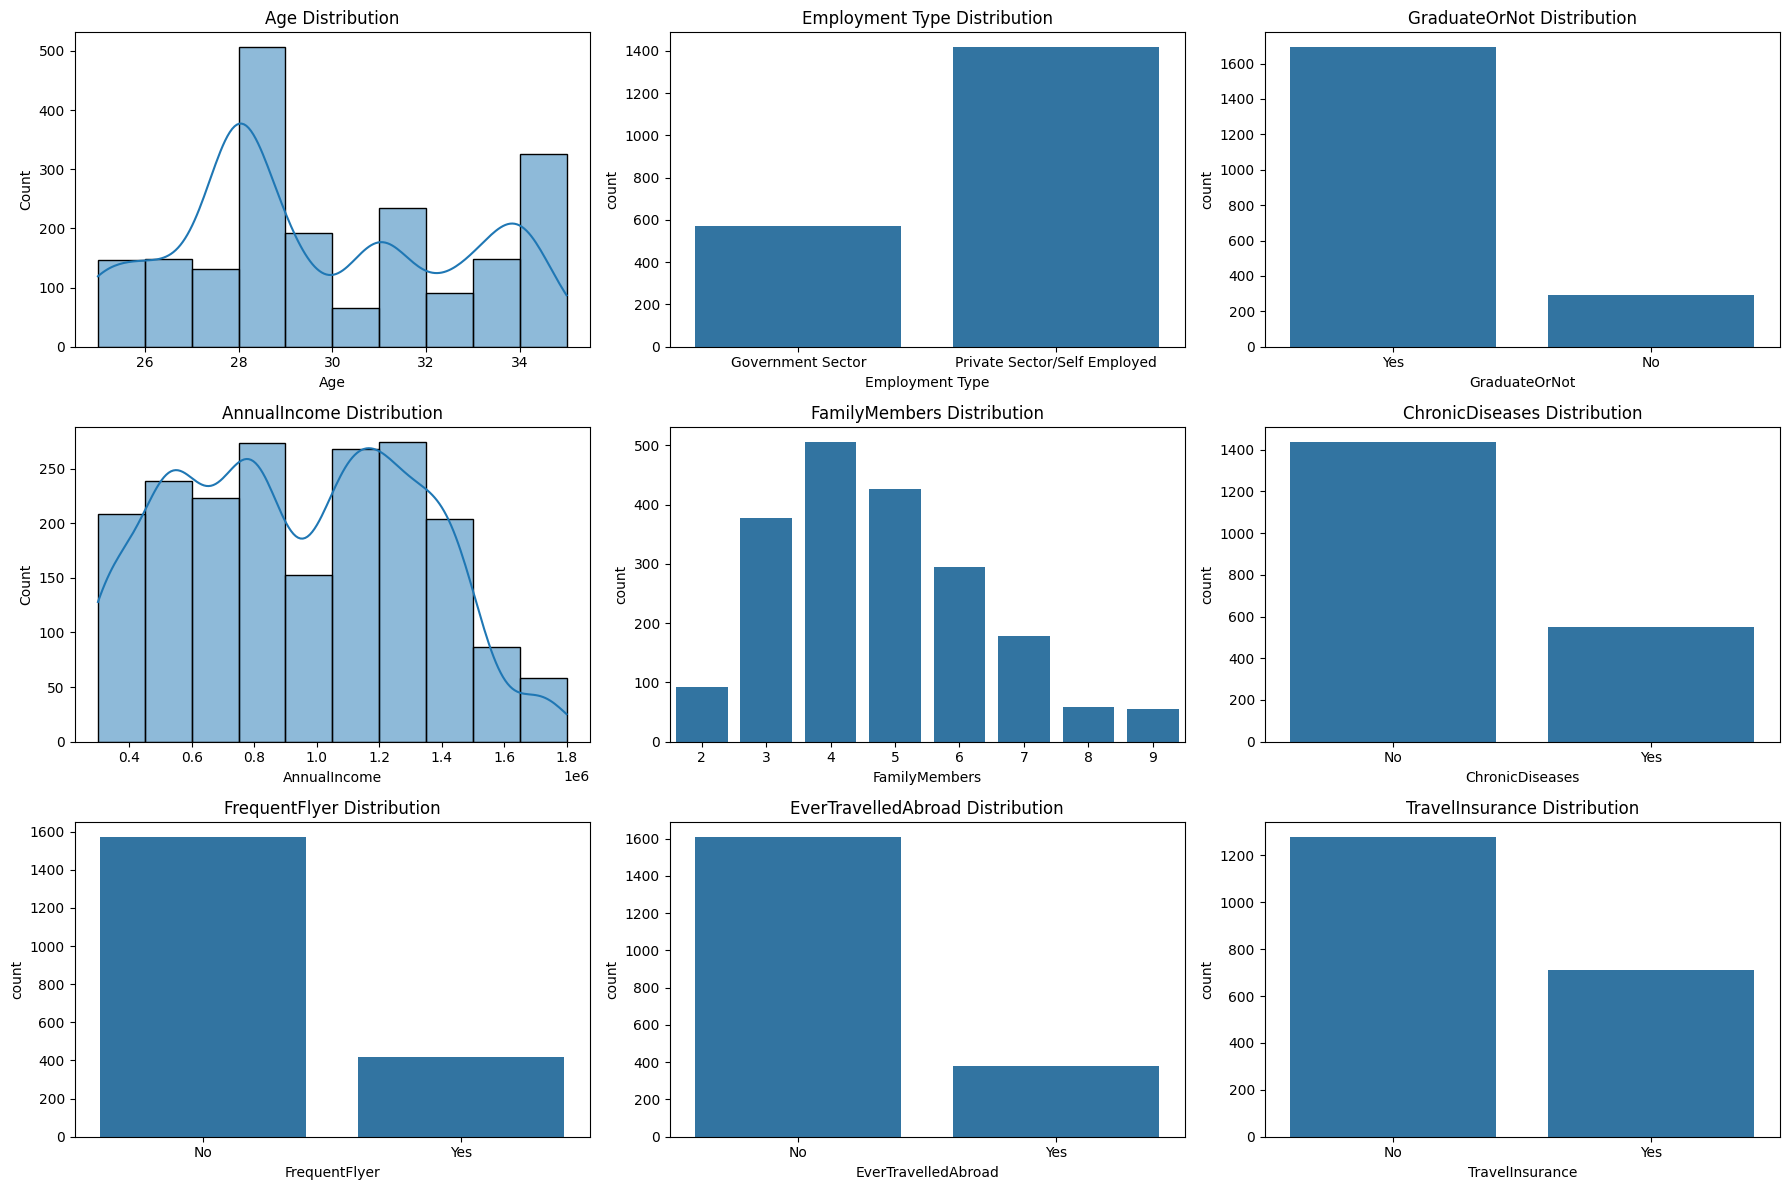

In [ ]:
import pandas as pd
PATH = "/content/TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframedf_copy = df.copy()
cols_to_plot = df.columns[1:]

plt.figure(figsize=(18, 12))

for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i+1)
    # Nếu là biến dạng object hoặc chỉ có 2 giá trị -> vẽ barplot
    if df[col].dtype == 'object' or df[col].nunique() <= 10:
        sns.countplot(x=col, data=df)
        plt.title(f'{col} Distribution')
        # Nếu là biến nhị phân dạng số, đặt lại nhãn
        if df[col].nunique() == 2 and set(df[col].unique()) == {0, 1}:
            plt.xticks([0, 1], ['No', 'Yes'])
    else:
        sns.histplot(df[col], bins=10, kde=True)
        plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here

In [ ]:
!pip install -q ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.1 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Report", explorative=True)
profile.to_file("travel_insurance_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 19.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Preprocessing

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop(df.columns[0], axis=1)
    return df

In [ ]:
df = preprocessing_data(df.copy())

## Feature Engineering

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


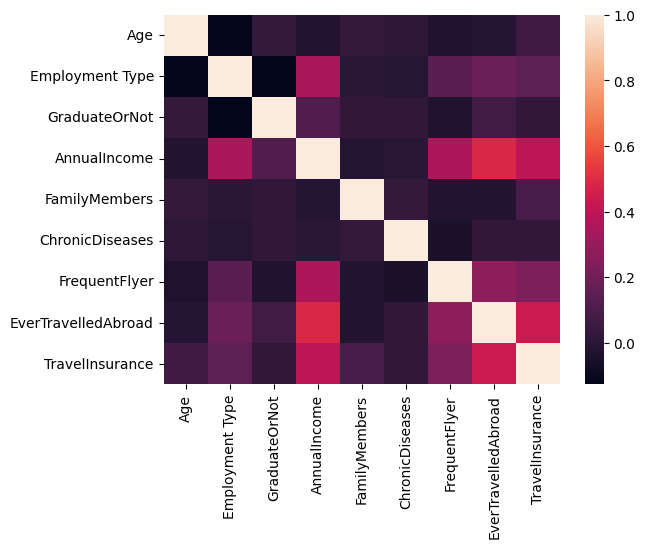

In [ ]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category').cat.codes
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data
display(df.head())

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('TravelInsurance', axis=1) # Todo: Select features
    y = df['TravelInsurance'] # Todo: Select label
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    return X, y

X, y = prepare_X_y(df)

X shape: (1987, 8)
y shape: (1987,)


# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

### Decision Tree

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))
    param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__max_features': [None, 'sqrt', 'log2'],
    'decisiontreeclassifier__class_weight': [None, 'balanced']
    }
    grid = GridSearchCV(pipe, param_grid, scoring='recall', cv=5, n_jobs=2)
    grid.fit(X, y)
    print("Best parameters:", grid.best_params_)
    return grid.best_estimator_

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    print("precision", precision_score(y_true , y_pred))
    print("recall", recall_score(y_true , y_pred))
    print("accuracy", accuracy_score(y_true , y_pred))
    print("F1", f1_score(y_true , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))
    print("Classification report: \n", classification_report(y_true , y_pred))

    print("Main Score (Recall):")
    main_score = recall_score(y_true, y_pred)
    return main_score


model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)

Best parameters: {'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 2}
precision 0.6059322033898306
recall 0.6441441441441441
accuracy 0.711892797319933
F1 0.6244541484716157
Confusion matrix: 
 [[282  93]
 [ 79 143]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       375
           1       0.61      0.64      0.62       222

    accuracy                           0.71       597
   macro avg       0.69      0.70      0.70       597
weighted avg       0.72      0.71      0.71       597

Main Score (Recall):


0.6441441441441441

#### SMOTE

In [ ]:
!pip install -q imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(trainX, trainY)

# Retrain Decision Tree on SMOTE data
model_smote = build_model(X_smote, y_smote)
pred_smote = model_smote.predict(testX)
calculate_performance(testY, pred_smote)

Best parameters: {'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
precision 0.6504854368932039
recall 0.6036036036036037
accuracy 0.7319932998324958
F1 0.6261682242990654
Confusion matrix: 
 [[303  72]
 [ 88 134]]
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       375
           1       0.65      0.60      0.63       222

    accuracy                           0.73       597
   macro avg       0.71      0.71      0.71       597
weighted avg       0.73      0.73      0.73       597

Main Score (Recall):


0.6036036036036037

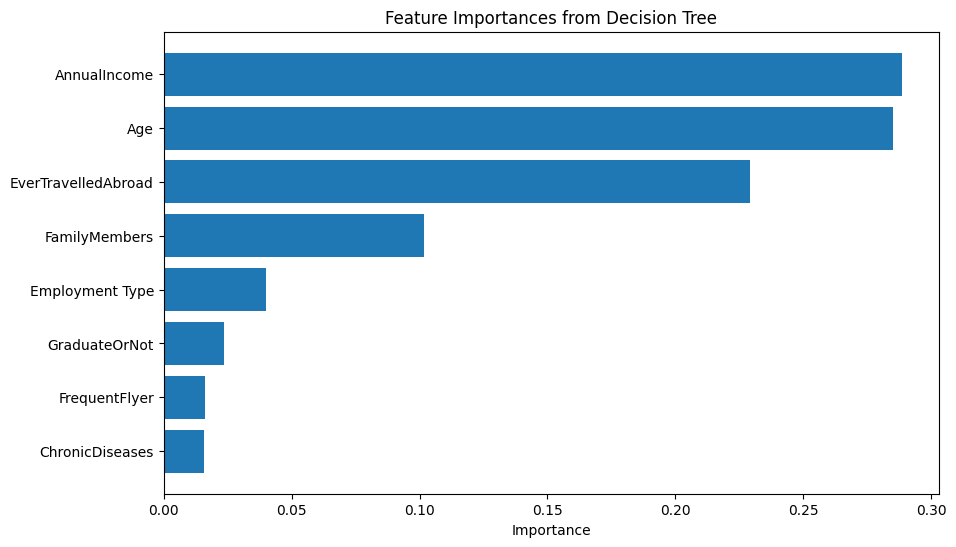

In [ ]:
import matplotlib.pyplot as plt

# Get the trained decision tree from the pipeline
tree_model = model.named_steps['decisiontreeclassifier']

# Get feature names
feature_names = trainX.columns if hasattr(trainX, 'columns') else [f"Feature {i}" for i in range(trainX.shape[1])]

# Feature importances
importances = tree_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

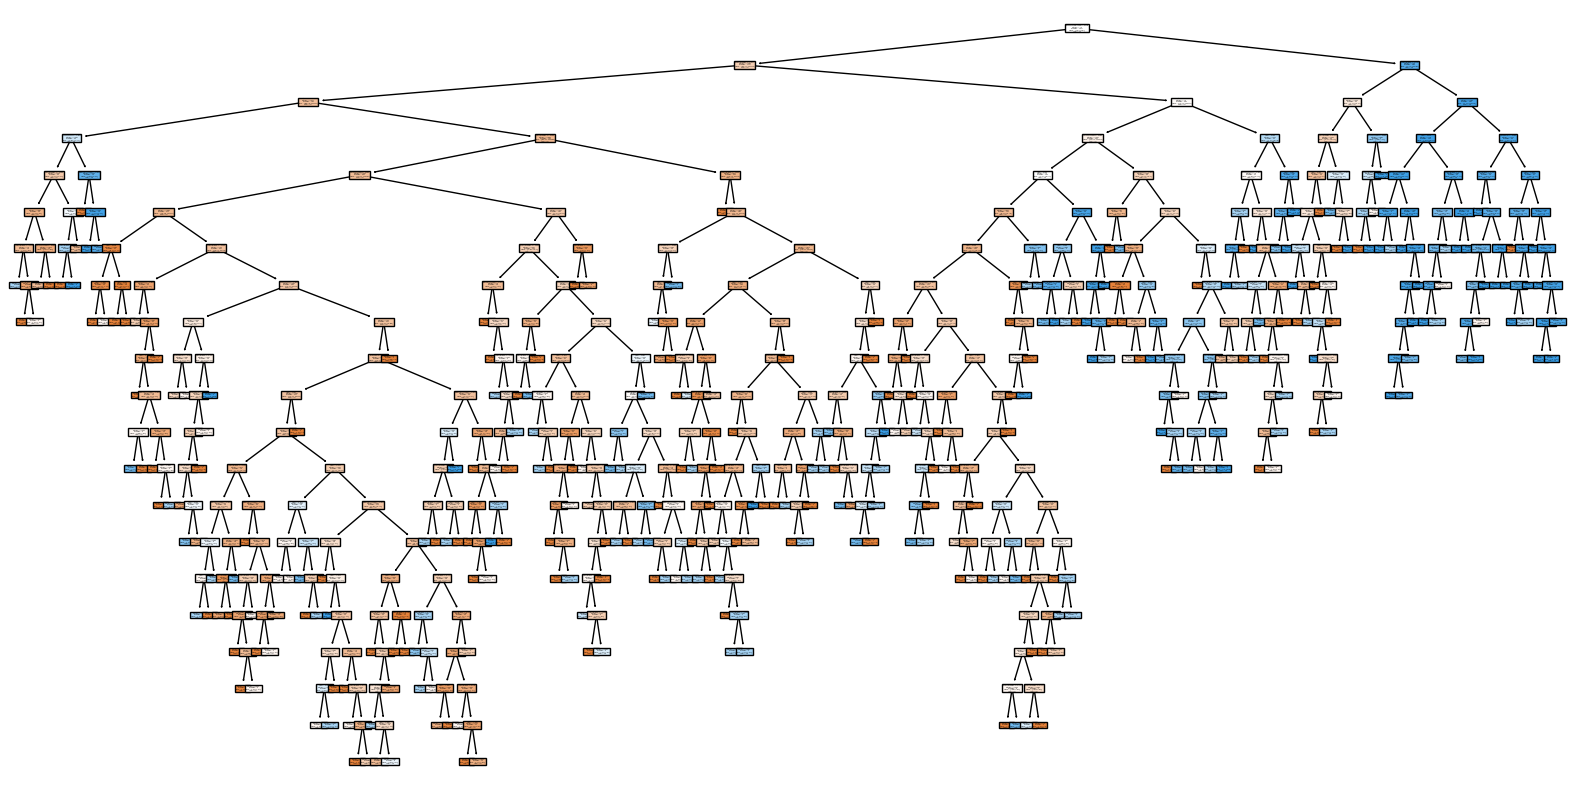

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=feature_names, class_names=["No", "Yes"], filled=True)
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def build_rf_model(X, y):
    """
    Train and tune a RandomForestClassifier
    :param X: feature matrix
    :param y: target
    :return: a trained RF model
    """
    pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
    param_grid = {
        'randomforestclassifier__n_estimators': [20, 50, 100, 200],
        'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
        'randomforestclassifier__max_depth': [None, 5, 10, 20],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4],
        'randomforestclassifier__max_features': [None, 'sqrt', 'log2'],
        'randomforestclassifier__class_weight': [None, 'balanced']
    }
    grid = GridSearchCV(pipe, param_grid, scoring='recall', cv=5, n_jobs=2)
    grid.fit(X, y)
    print("[RandomForest] Best parameters:", grid.best_params_)
    return grid.best_estimator_

# Train and evaluate Random Forest
rf_model = build_rf_model(trainX, trainY)
rf_pred = rf_model.predict(testX)
print("Random Forest Performance:")
calculate_performance(testY, rf_pred)

[RandomForest] Best parameters: {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 100}
Random Forest Performance:
precision 0.7371134020618557
recall 0.6441441441441441
accuracy 0.7822445561139029
F1 0.6875
Confusion matrix: 
 [[324  51]
 [ 79 143]]
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       375
           1       0.74      0.64      0.69       222

    accuracy                           0.78       597
   macro avg       0.77      0.75      0.76       597
weighted avg       0.78      0.78      0.78       597

Main Score (Recall):


0.6441441441441441

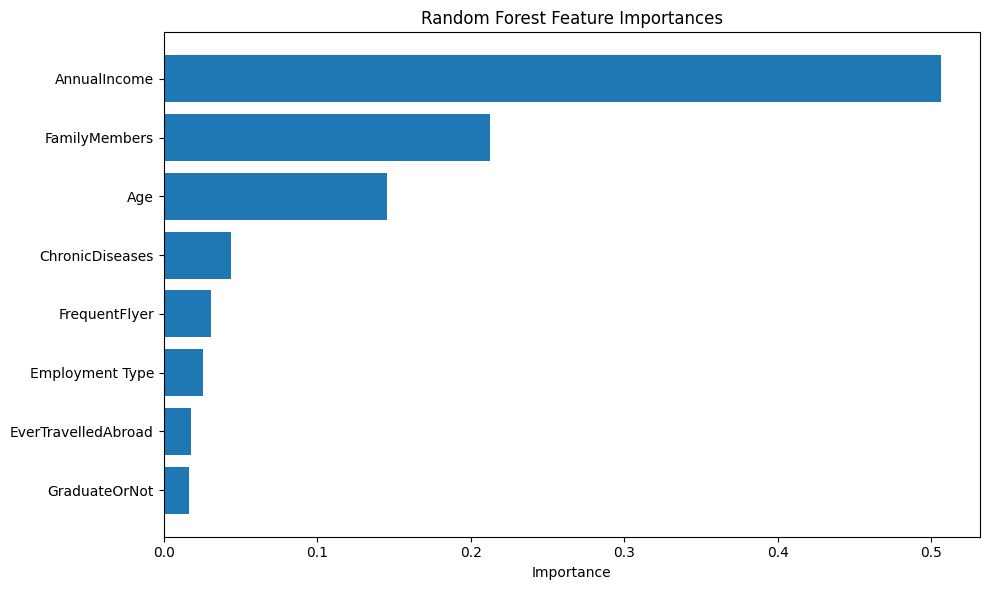

In [ ]:
# Get feature importances from Random Forest
rf = rf_model.named_steps['randomforestclassifier']
feature_names = trainX.columns if hasattr(trainX, 'columns') else [f"Feature {i}" for i in range(trainX.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

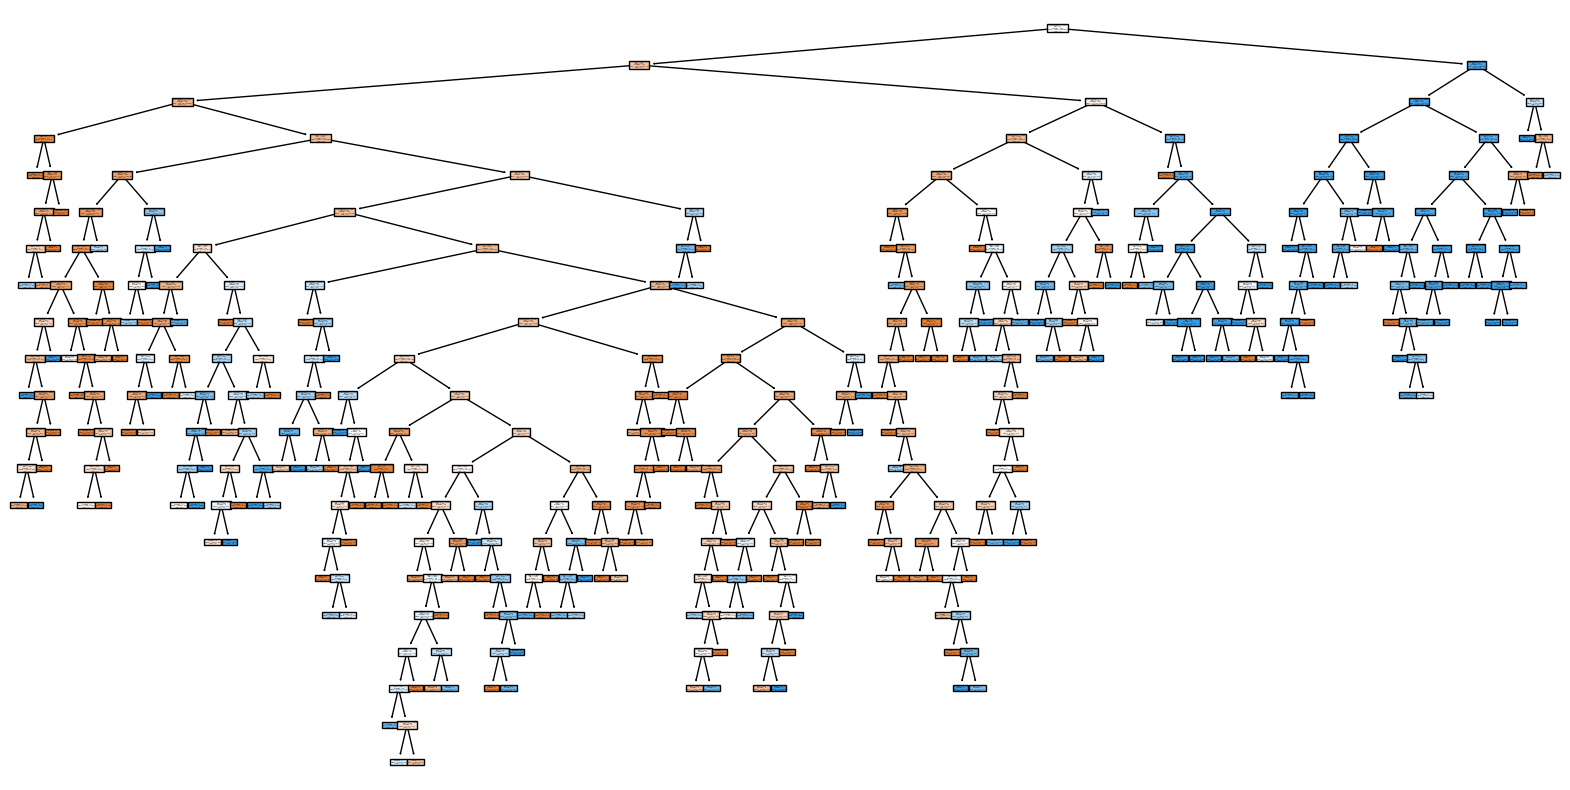

In [ ]:
one_tree = rf.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(one_tree, feature_names=feature_names, class_names=["No", "Yes"], filled=True)
plt.show()

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Other conclusion: "

7.
- Có thể cân nhắc chọn F1-score hoặc recall:
  -  Với F1-score: dữ liệu mất cân bằng (số người mua bảo hiểm ít hơn nhiều so với không mua), F1-score có thể giúp cân bằng giữa việc dự đoán đúng khách hàng mua bảo hiểm (recall) và hạn chế dự đoán nhầm (precision). Có thể dùng F1-score với mục đích nghiên cứu, khảo sát và chưa có lý do đủ thuyết phục để chọn recall.
  - Với recall: nếu mục tiêu là không bỏ sót bất kỳ khách hàng tiềm năng nào (ưu tiên tiếp cận càng nhiều người có khả năng mua càng tốt). Trong ngữ cảnh này thì Recall sẽ được ưu tiên hơn do không làm mất đi cơ hội kinh doanh

- Mô hình chính là Random Forest với các tham số từ GridSearchCV
  - [RandomForest] Best parameters: {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 100}
  - Chọn Random forest vì có kết quả tốt, cả f1-score và recall đều cao so với các mô hình thử nghiệm, đồng thời precision và recall cũng cải thiện hơn.